# Setup

In [ ]:
!git clone https://github.com/tanvipenumudy/Winter-Internship-Internity.git

fatal: destination path 'Winter-Internship-Internity' already exists and is not an empty directory.


In [ ]:
path = '/content/Winter-Internship-Internity/Day 05/images/'

# CV2

cv2 is one of the computer vision library. CV can import image as a numpy array format.

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = cv.imread(path+'logo.jpg')
img

array([[[  1,   3, 198],
        [  2,   5, 197],
        [  1,   1, 195],
        ...,
        [ 10,  29, 210],
        [ 17,  35, 212],
        [ 13,  31, 208]],

       [[  2,   2, 202],
        [  1,   1, 201],
        [  1,   1, 203],
        ...,
        [  7,  28, 214],
        [  9,  26, 213],
        [ 13,  31, 214]],

       [[  1,   0, 204],
        [  0,   1, 205],
        [  1,   0, 204],
        ...,
        [ 13,  25, 219],
        [ 10,  29, 216],
        [  7,  27, 216]],

       ...,

       [[  0,   0, 204],
        [  0,   0, 206],
        [  0,   0, 204],
        ...,
        [ 17,  33, 223],
        [ 10,  35, 223],
        [ 15,  34, 223]],

       [[  0,   0, 204],
        [  0,   0, 206],
        [  0,   0, 204],
        ...,
        [ 14,  33, 222],
        [ 15,  34, 223],
        [ 14,  33, 222]],

       [[  0,   0, 204],
        [  0,   0, 204],
        [  0,   0, 206],
        ...,
        [ 18,  35, 222],
        [ 15,  34, 221],
        [ 15,  34, 223]]

In [ ]:
img.shape

(260, 462, 3)

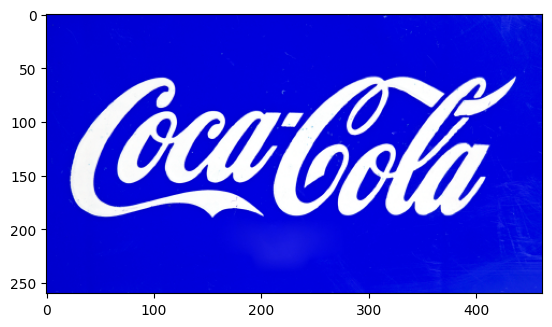

In [ ]:
img = cv.imread(path + '/logo.jpg')
plt.imshow(img)

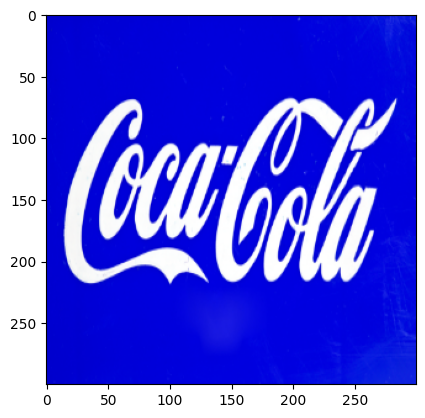

In [ ]:
img_re = cv.resize(img,(300,300))
plt.imshow(img_re)

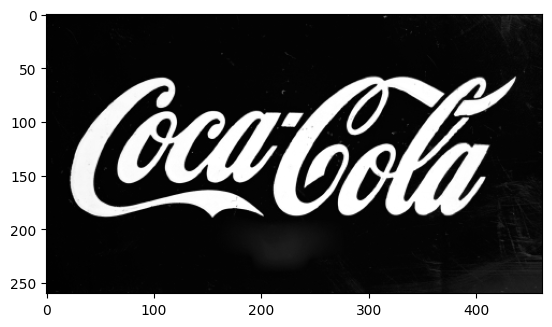

In [ ]:
img_gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')

In [ ]:
img_flat = img.flatten().shape
img_flat

(360360,)

# Harr Like Feature

Berusaha mendeteksi berdasarkan pattern tertentu

In [ ]:
from skimage.feature import haar_like_feature
from skimage.transform import integral_image

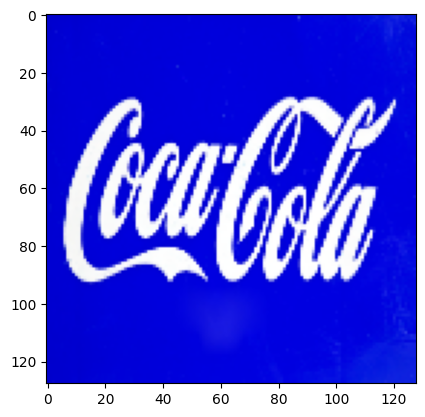

In [ ]:
img_re = cv.resize(img,(128,128))
plt.imshow(img_re)

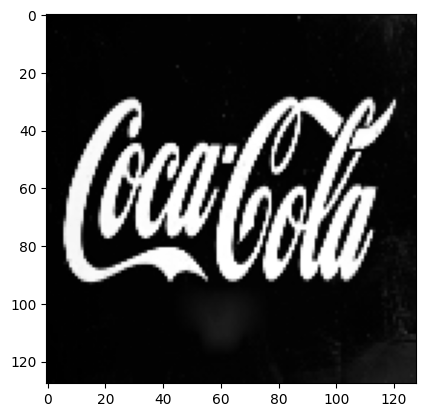

In [ ]:
img_gr = cv.cvtColor(img_re,cv.COLOR_RGB2GRAY)
plt.imshow(img_gr,cmap='gray')

In [ ]:
img_gr

array([[24, 23, 23, ..., 38, 43, 45],
       [23, 23, 23, ..., 45, 43, 42],
       [23, 23, 24, ..., 34, 52, 45],
       ...,
       [23, 23, 23, ..., 49, 58, 50],
       [23, 23, 23, ..., 49, 48, 49],
       [23, 23, 28, ..., 49, 49, 50]], dtype=uint8)

In [ ]:
# To speed up the example, extract the two types of features only
feature_types = ['type-2-x','type-2-y']

In [ ]:
ii = integral_image(img_gr)
ii

array([[     24,      47,      70, ...,    3457,    3500,    3545],
       [     47,      93,     139, ...,    6997,    7083,    7170],
       [     70,     139,     209, ...,   10458,   10596,   10728],
       ...,
       [   3041,    6081,    9102, ..., 1117165, 1121182, 1125220],
       [   3064,    6127,    9171, ..., 1121001, 1125066, 1129153],
       [   3087,    6173,    9245, ..., 1124866, 1128980, 1133117]],
      dtype=uint64)

In [ ]:
results=haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_types)

In [ ]:
results.shape

(104400,)

# LBP
LBP (Local Binary Pattern) merupakan salah satu metode yang dapat mengextract data image agar siap dianalisis menjadi feature

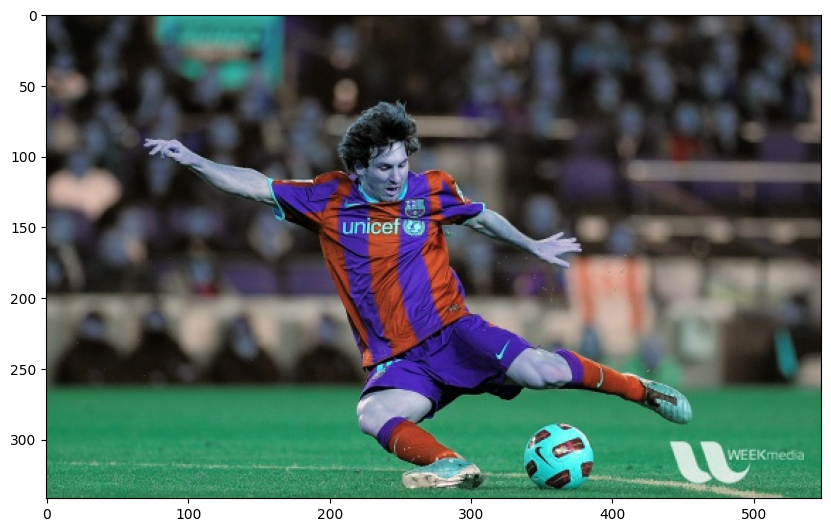

In [ ]:
img_messi = cv.imread(path+'messi.jpg')
plt.figure(figsize=(10,7))
plt.imshow(img_messi)

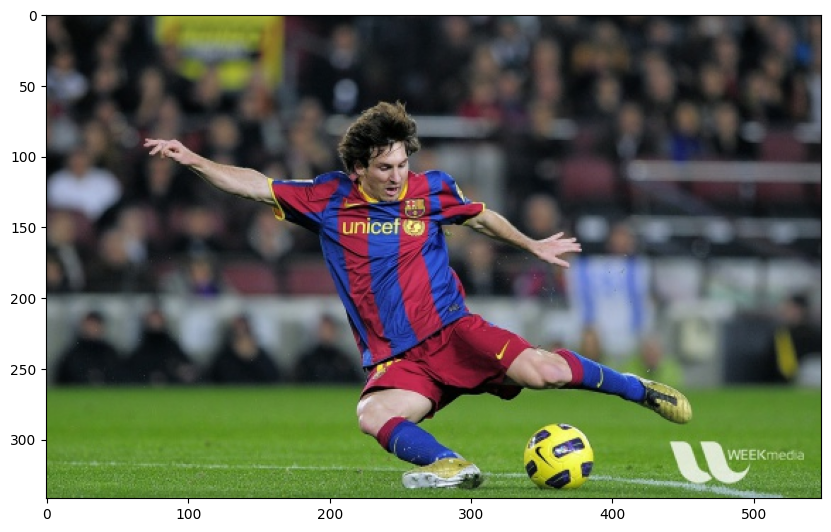

In [ ]:
img_messi = cv.cvtColor(img_messi, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,7))
plt.imshow(img_messi,cmap='gray')

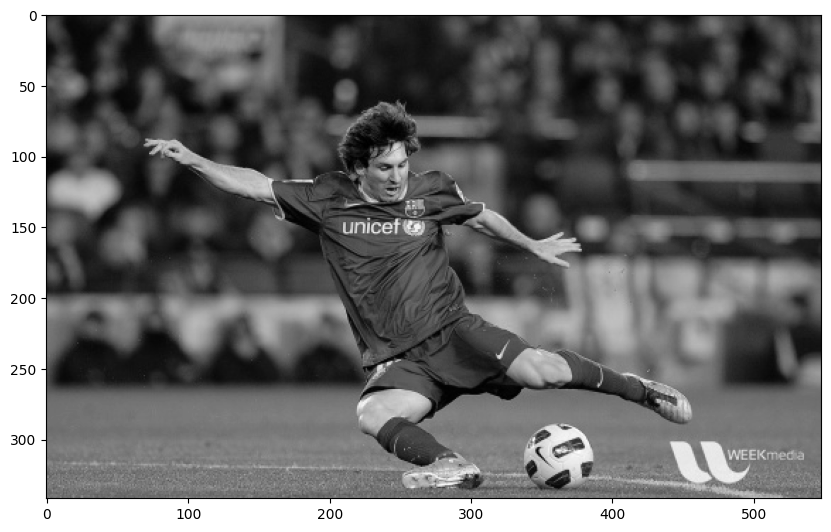

In [ ]:
img_messi = cv.cvtColor(img_messi, cv.COLOR_RGB2GRAY)
plt.figure(figsize=(10,7))
plt.imshow(img_messi,cmap='gray')

In [ ]:
from skimage import feature

In [ ]:
num_points=8
radius=1

img_lbp = feature.local_binary_pattern(img_messi,num_points,radius)

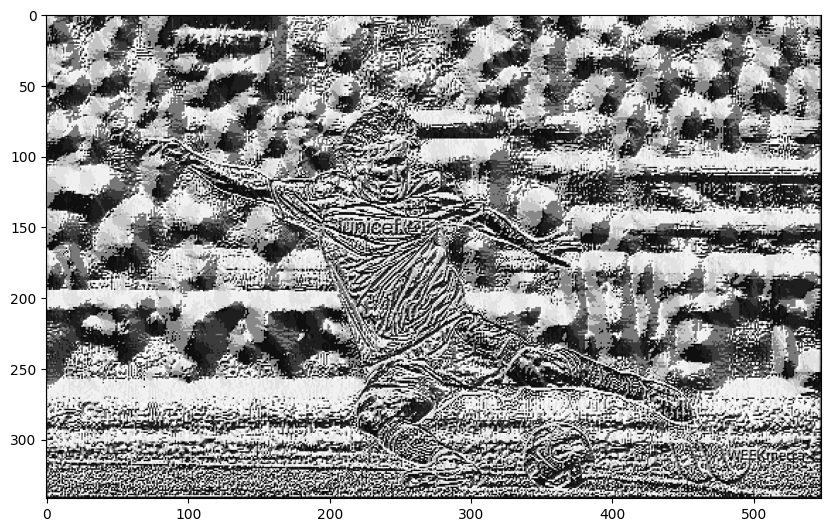

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(img_lbp,cmap='gray')

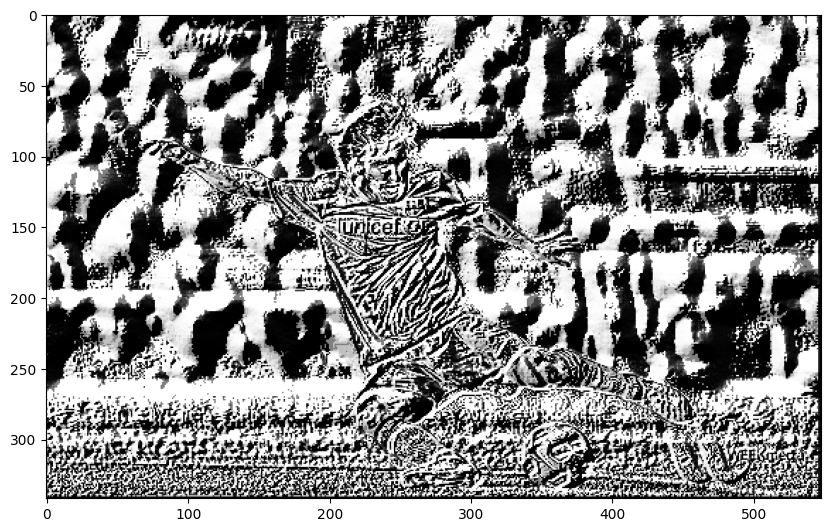

In [ ]:
num_points=24
radius=2

img_lbp = feature.local_binary_pattern(img_messi,num_points,radius)
plt.figure(figsize=(10,7))
plt.imshow(img_lbp,cmap='gray')

(array([67997.,  6620.,  7839.,   501.,  8031.,  7365.,   504.,  9408.,
         6990., 72161.]),
 array([       0. ,  1677721.5,  3355443. ,  5033164.5,  6710886. ,
         8388607.5, 10066329. , 11744050.5, 13421772. , 15099493.5,
        16777215. ]),
 <BarContainer object of 10 artists>)

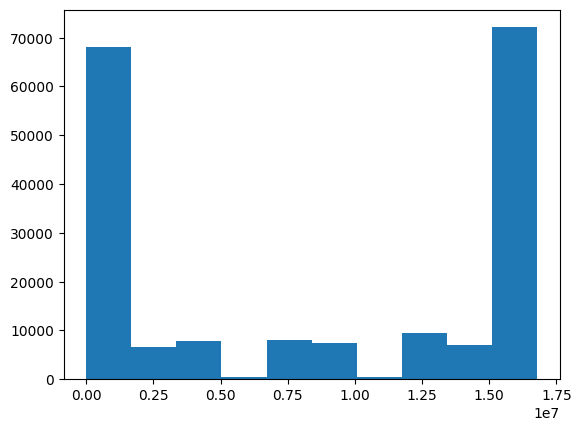

In [ ]:
flat_lbp = img_lbp.flatten()
plt.hist(flat_lbp)

In [ ]:
hist, _ = np.histogram(flat_lbp,
                       bins=np.arange(0,2**num_points+1),
                       range=np.arange(0,2**num_points))

In [ ]:
hist = hist/np.sum(hist)
hist

array([2.44482862e-02, 2.97199812e-03, 1.60071712e-05, ...,
       1.60071712e-04, 1.60605285e-03, 3.47515687e-02])

In [ ]:
# import the necessary packages
def LocalBinaryPatterns(image,num_points,radius):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, num_points,radius)
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, 2**num_points + 1),
			range=(0, 2**num_points))

		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum())
		# return the histogram of Local Binary Patterns
		return hist

In [ ]:
LocalBinaryPatterns(img_messi,8,1)

array([3.37644598e-02, 1.07034618e-02, 1.31258804e-03, 3.86839971e-03,
       9.49225253e-03, 1.63273146e-03, 4.63140820e-03, 2.10761088e-02,
       1.53135271e-03, 4.58872241e-04, 1.97421778e-04, 4.42865070e-04,
       4.61540103e-03, 8.11030008e-04, 1.21921287e-02, 4.48307508e-02,
       1.04420114e-02, 4.16186452e-03, 4.00179280e-04, 8.64387245e-04,
       1.52068127e-03, 2.45443292e-04, 7.79015666e-04, 1.16852350e-03,
       3.99112136e-03, 8.05694284e-04, 2.56114739e-04, 6.08272506e-04,
       2.00943356e-02, 1.13117343e-03, 3.66137363e-02, 3.45221326e-02,
       1.41396679e-03, 3.78836385e-04, 6.40286849e-05, 1.33393093e-04,
       2.93464806e-04, 6.93644086e-05, 1.65407436e-04, 2.24100397e-04,
       1.49400265e-04, 4.80215136e-05, 1.60071712e-05, 3.73500662e-05,
       1.70743160e-04, 6.93644086e-05, 2.50779016e-04, 5.76258164e-04,
       3.61762069e-03, 7.25658428e-04, 1.28057370e-04, 2.02757502e-04,
       6.66965467e-04, 8.53715798e-05, 1.92086055e-04, 3.30814872e-04,
      